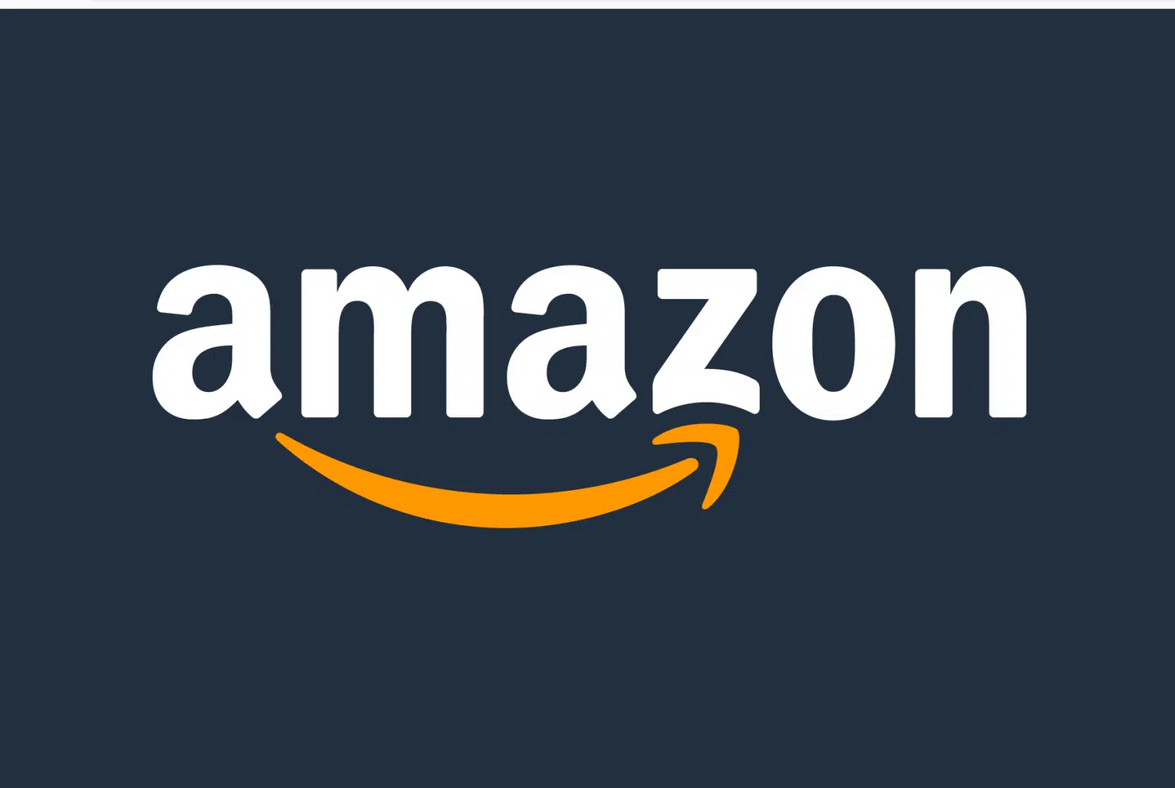

In [2]:
from IPython.display import Image, display

# Display the image
display(Image(filename='Amazon_logo.png'))


# Amazon Delivery Analysis

This notebook explores and analyzes delivery time data with the goal of improving delivery efficiency. The data includes information on orders, agents, locations, times, and external factors such as weather and traffic conditions.


## Business Problem

In the competitive world of e-commerce, timely delivery is crucial for customer satisfaction and retention. This project aims to analyze delivery times and identify key factors contributing to delays. By understanding these factors, the company can make informed decisions to enhance delivery efficiency and improve overall customer satisfaction.
The source of the data set is from https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset

## Data Overview

The dataset contains information on approximately 43,739 delivery orders. It includes the following 16 columns:
- `Order ID`: Unique identifier for each order
- `Agent Age`: Age of the delivery agent
- `Agent Rating`: Performance rating of the delivery agent
- `Store Latitude/Longitude`: Geographic location of the store
- `Drop Latitude/Longitude`: Geographic location of the delivery destination
- `Order Time`: Timestamp of when the order was placed
- `Pickup Time`: Timestamp of when the order was picked up
- `Delivery Time`: Timestamp of when the order was delivered
- `Weather`: Weather conditions during delivery
- `Traffic`: Traffic conditions during delivery
- `Vehicle`: Type of vehicle used for delivery
- `Area`: Urban or rural area designation
- `Category`: Type of items in the order (e.g., electronics, groceries)

The data will be analyzed to uncover patterns and insights that could help reduce delivery times and improve operational efficiency.


In [4]:
!pip install matplotlib seaborn


In [5]:
!pip install importlib_resources


In [6]:
!pip install scikit-learn


In [7]:
#Importing Pandas and numpy Librbary 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

In [9]:
# Importing the data

df = pd.read_csv('amazon_delivery.csv')

In [10]:
# understanging the Data framework = 43,739 Rows and 16 colummns
df.shape

(43739, 16)

In [11]:
# Undertsanding the column_names
df.head(16)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,3/19/2022,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,3/25/2022,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,3/19/2022,8:30:00,8:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,4/5/2022,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,3/26/2022,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,3/11/2022,21:20:00,21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,3/4/2022,19:15:00,19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,3/14/2022,17:25:00,17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,3/20/2022,20:55:00,21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2/12/2022,21:55:00,22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys


In [22]:
# Data types
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [23]:
# We want a count of Null values in the data set

print(df.isnull().sum())

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time         91
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


In [24]:
import pandas as pd

# Sample DataFrame for context (replace with your actual DataFrame)
# df = pd.DataFrame({'Order_Time': ['23:30:00', '12:15:00'], 'Pickup_Time': ['00:15:00', '13:00:00']})

# Step 1: Convert Order_Time and Pickup_Time to datetime, but keep only time (no date)
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Step 2: Drop rows with missing Order_Time or Pickup_Time
df_cleaned = df.dropna(subset=['Order_Time', 'Pickup_Time']).copy()

# Step 3: Function to handle time difference, accounting for midnight
def calculate_time_difference(row):
    order_time = pd.to_datetime(row['Order_Time'], format='%H:%M:%S')
    pickup_time = pd.to_datetime(row['Pickup_Time'], format='%H:%M:%S')
    
    # If the pickup time is earlier than the order time, add 1 day to pickup time
    if pickup_time < order_time:
        pickup_time += pd.Timedelta(days=1)
    
    # Calculate the difference in minutes
    return (pickup_time - order_time).total_seconds() / 60

# Step 4: Calculate the time difference and assign it to the DataFrame
df_cleaned.loc[:, 'Time_Difference'] = df_cleaned.apply(calculate_time_difference, axis=1)

# Step 5: Calculate the average, median, and mode of the time differences in minutes
average_time_difference_minutes = df_cleaned['Time_Difference'].mean()
median_time_difference_minutes = df_cleaned['Time_Difference'].median()
mode_time_difference_minutes = df_cleaned['Time_Difference'].mode().values[0]  # Gets the first mode

# Display the cleaned DataFrame, average, median, and mode time difference
print(df_cleaned)
print(f"Average Time Difference in Minutes: {average_time_difference_minutes:.2f} minutes")
print(f"Median Time Difference in Minutes: {median_time_difference_minutes:.2f} minutes")
print(f"Mode Time Difference in Minutes: {mode_time_difference_minutes:.2f} minutes")


            Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
0      ialx566343618         37           4.9       22.745049   
1      akqg208421122         34           4.5       12.913041   
2      njpu434582536         23           4.4       12.914264   
3      rjto796129700         38           4.7       11.003669   
4      zguw716275638         32           4.6       12.972793   
...              ...        ...           ...             ...   
43734  jlxf819993117         30           4.8       26.902328   
43735  aevx342135787         21           4.6        0.000000   
43736  xnek760674819         30           4.9       13.022394   
43737  cynl434665991         20           4.7       11.001753   
43738  nsyz997960170         23           4.9       23.351058   

       Store_Longitude  Drop_Latitude  Drop_Longitude Order_Date Order_Time  \
0            75.892471      22.765049       75.912471  3/19/2022   11:30:00   
1            77.683237      13.043041       77.813237  3/25/2

In [25]:
import pandas as pd

# Assuming df_cleaned is your DataFrame and 'Delivery_Time' is the column
# Calculate the average of the delivery times in minutes
average_delivery_time_minutes = df_cleaned['Delivery_Time'].mean()

# Calculate the median of the delivery times in minutes
median_delivery_time_minutes = df_cleaned['Delivery_Time'].median()

# Calculate the mode of the delivery times in minutes (first mode if there are multiple)
mode_delivery_time_minutes = df_cleaned['Delivery_Time'].mode().values[0]

# Display the average, median, and mode delivery times
print(f"Average Delivery Time in Minutes: {average_delivery_time_minutes:.2f} minutes")
print(f"Median Delivery Time in Minutes: {median_delivery_time_minutes:.2f} minutes")
print(f"Mode Delivery Time in Minutes: {mode_delivery_time_minutes:.2f} minutes")



Average Delivery Time in Minutes: 124.91 minutes
Median Delivery Time in Minutes: 125.00 minutes
Mode Delivery Time in Minutes: 130.00 minutes


In [26]:
# We want a count of Null values in the data set after amendments
df_cleaned.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather             0
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
Time_Difference     0
dtype: int64

In [27]:
# understanding the statistical information about the data
df_cleaned.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,Time_Difference
count,43648.000000,43594.000000,43648.000000,43648.000000,43648.000000,43648.000000,43648.000000,43648.000000
mean,29.555008,4.635287,17.241141,70.761342,17.462404,70.824935,124.914475,9.991294
std,5.761482,0.313827,7.703568,21.145246,7.341862,21.145411,51.933163,4.086680
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,10.000000,5.000000
25%,25.000000,4.500000,12.933298,73.170283,12.986229,73.280000,90.000000,5.000000
50%,30.000000,4.700000,18.554382,75.898497,18.633934,76.002471,125.000000,10.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785089,78.103395,160.000000,15.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,270.000000,15.000000


In [30]:
# Checking for Duplictes throught the columns

print (df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
43734    False
43735    False
43736    False
43737    False
43738    False
Length: 43739, dtype: bool


In [19]:
#Checking for Duplicates Order_id

df.duplicated(subset =['Order_ID',])

0        False
1        False
2        False
3        False
4        False
         ...  
43734    False
43735    False
43736    False
43737    False
43738    False
Length: 43739, dtype: bool

In [19]:
# Group by Year and Month and count occurrences

# Convert 'Order_Date' to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

df['Order_Date'].dt.to_period('M').value_counts().sort_index()

Order_Date
2022-02     6982
2022-03    30658
2022-04     6099
Freq: M, Name: count, dtype: int64

In [20]:
# Category count to establish how many were sold for each category

df["Category"].value_counts()

Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name: count, dtype: int64

In [21]:
# Count occurrences of each vehicle type
vehicle_counts = df_cleaned['Vehicle'].value_counts()

# Display the counts
print(vehicle_counts)


Vehicle
motorcycle     25519
scooter        14607
van             3522
Name: count, dtype: int64


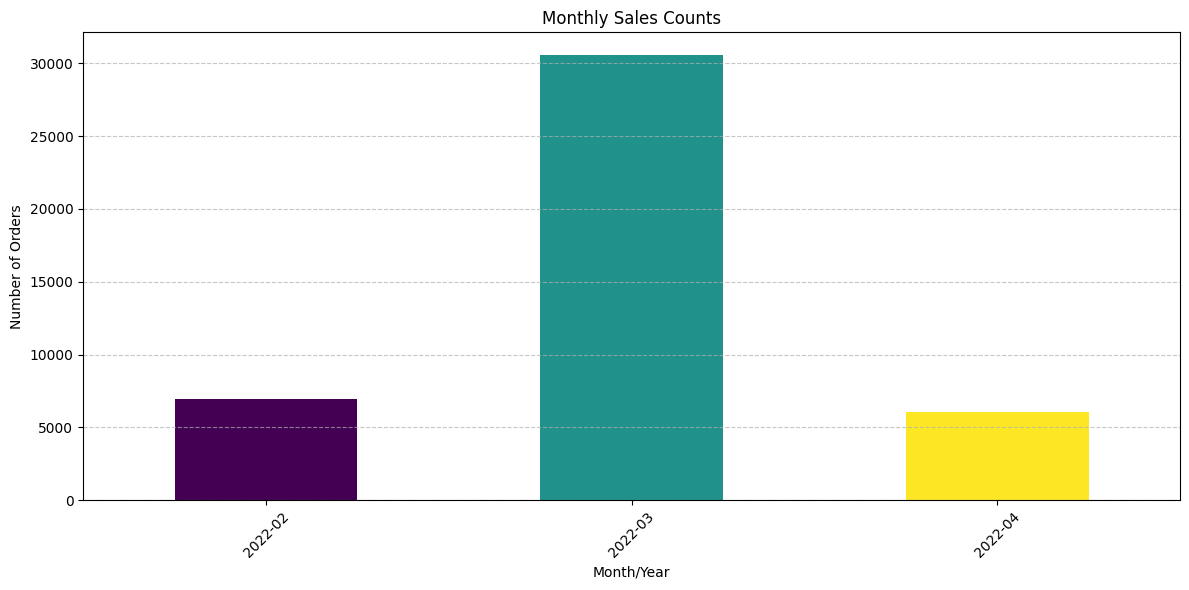

In [22]:
# Convert 'Order_Date' to datetime if it's not already in the correct format
df_cleaned['Order_Date'] = pd.to_datetime(df_cleaned['Order_Date'], errors='coerce')

# Now group by Year-Month and count occurrences
monthly_counts = df_cleaned['Order_Date'].dt.to_period('M').value_counts().sort_index()

# Convert the PeriodIndex to string for plotting
monthly_counts.index = monthly_counts.index.astype(str)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Assuming df_cleaned is your DataFrame
# Step 1: Ensure 'Order_Date' is in datetime format
df_cleaned['Order_Date'] = pd.to_datetime(df_cleaned['Order_Date'], errors='coerce')

# Step 2: Group by Year-Month and count occurrences
monthly_counts = df_cleaned['Order_Date'].dt.to_period('M').value_counts().sort_index()

# Step 3: Convert the PeriodIndex to string for plotting
monthly_counts.index = monthly_counts.index.astype(str)

# Step 4: Generate a list of colors for the bars
num_bars = len(monthly_counts)
colors = cm.viridis(np.linspace(0, 1, num_bars))  # Using the 'viridis' colormap

# Step 5: Plot the data as a bar chart with different colors
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color=colors)
plt.title('Monthly Sales Counts')
plt.xlabel('Month/Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



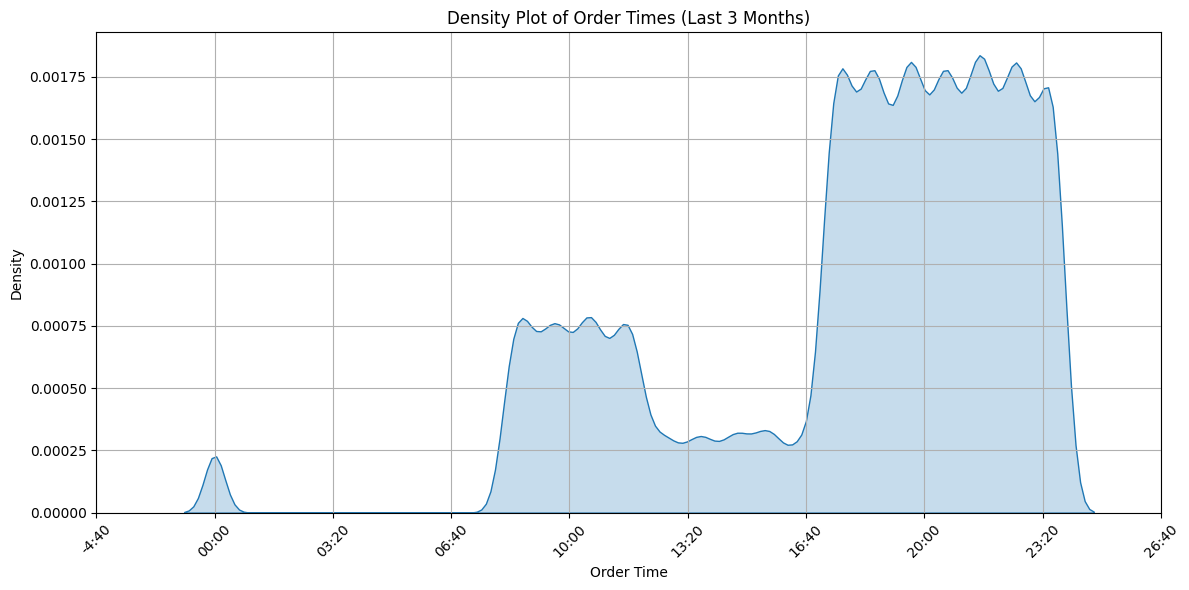

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have the correct DataFrame
df = df_cleaned.copy()  # Make a copy to avoid warnings

# Convert 'Order_Date' to datetime format using .loc
df.loc[:, 'Order_Date'] = pd.to_datetime(df['Order_Date'])

# Filter data for the last 3 months
end_date = df['Order_Date'].max()
start_date = end_date - pd.DateOffset(months=3)
df_filtered = df[(df['Order_Date'] >= start_date) & (df['Order_Date'] <= end_date)]

# Convert 'Order_Time' to datetime format and then to minutes since midnight using .loc
df_filtered.loc[:, 'Order_Time'] = pd.to_datetime(df_filtered['Order_Time'], format='%H:%M:%S').dt.time
df_filtered.loc[:, 'Order_Time_Minutes'] = df_filtered['Order_Time'].apply(lambda x: x.hour * 60 + x.minute)

# Plot Density Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df_filtered['Order_Time_Minutes'], bw_adjust=0.5, fill=True)
plt.title('Density Plot of Order Times (Last 3 Months)')
plt.xlabel('Order Time')
plt.ylabel('Density')

# Convert minutes since midnight to HH:MM format for x-axis
xticks = plt.gca().get_xticks()
xtick_labels = [f'{int(minute // 60):02}:{int(minute % 60):02}' for minute in xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


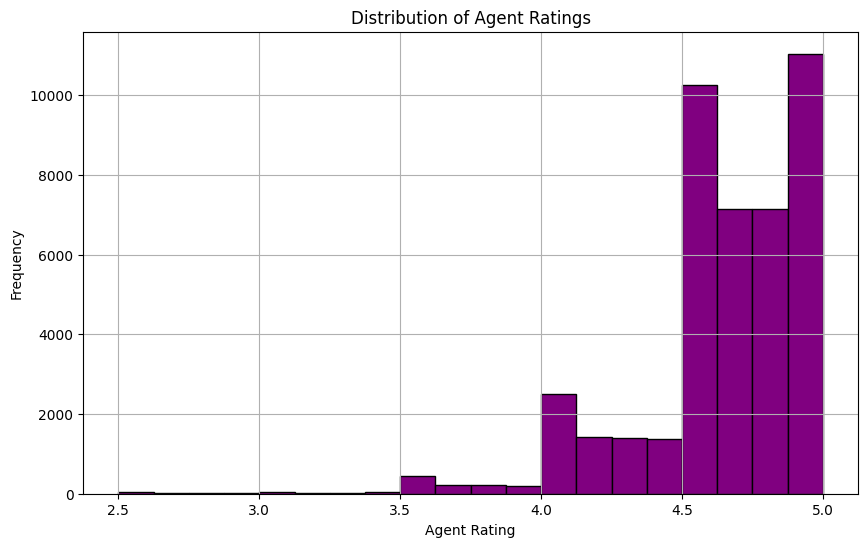

In [24]:

plt.figure(figsize=(10, 6))
plt.hist(df['Agent_Rating'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Agent Ratings')
plt.xlabel('Agent Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


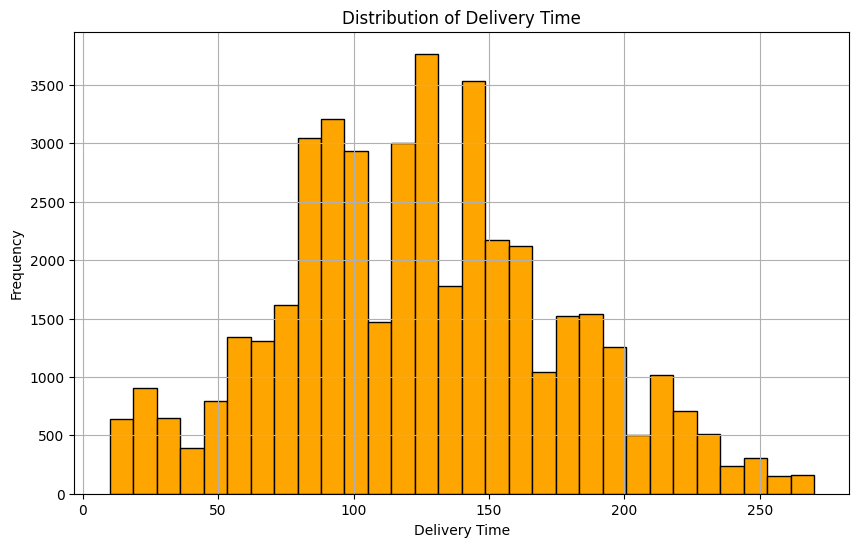

In [25]:
import matplotlib.pyplot as plt

# Plot histogram for delivery time (keeping original format)
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Delivery_Time'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


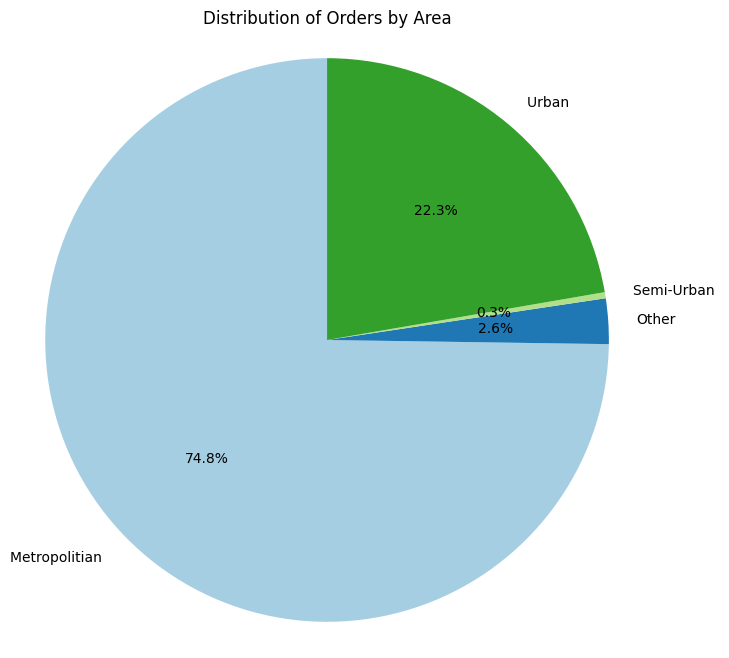

In [26]:
area_orders = df_cleaned.groupby('Area')['Order_ID'].count()


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(area_orders, labels=area_orders.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Orders by Area')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


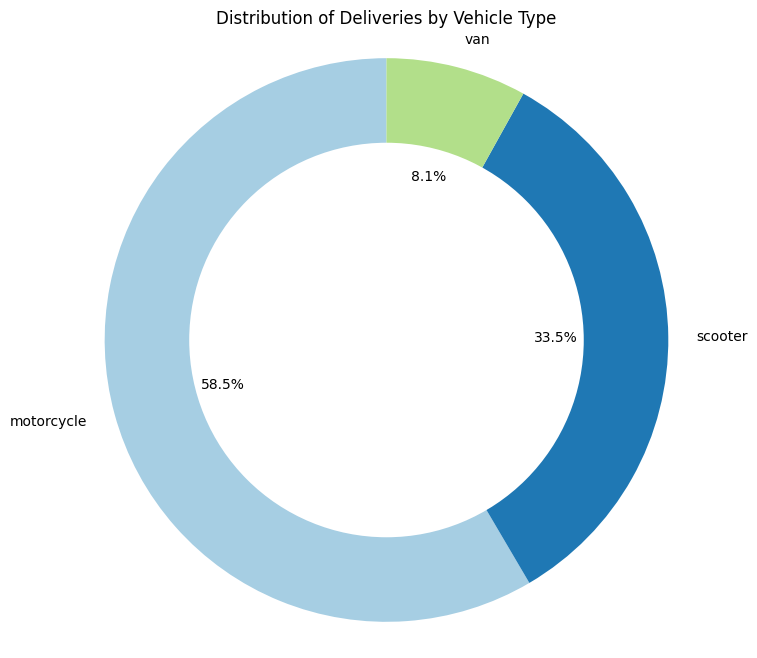

In [27]:
# Vehicle counts data
vehicle_counts = {'motorcycle': 25486, 'scooter': 14590, 'van': 3518}

# Plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_counts.values(), labels=vehicle_counts.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops={'width': 0.4})  # Set 'width' to create a donut shape
plt.title('Distribution of Deliveries by Vehicle Type')

# Draw a circle at the center to turn the pie chart into a donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that the chart is circular
plt.show()


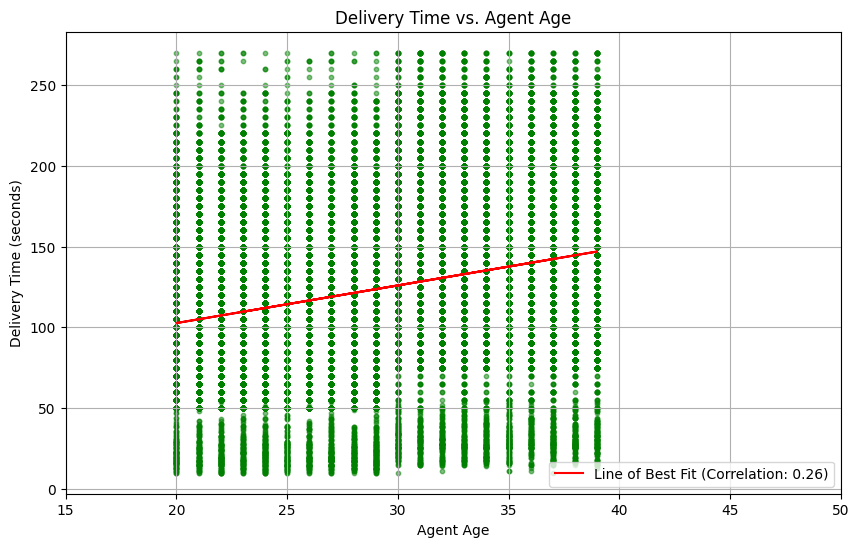

In [28]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Agent_Age'], df_cleaned['Delivery_Time'], alpha=0.5, color='green', s=10)

# Set title and labels
plt.title('Delivery Time vs. Agent Age')
plt.xlabel('Agent Age')
plt.ylabel('Delivery Time (seconds)')
plt.xlim(15, 50)

# Add grid
plt.grid(True)

# Calculate the correlation
correlation = df_cleaned['Agent_Age'].corr(df_cleaned['Delivery_Time'])

# Fit a line of best fit
m, b = np.polyfit(df_cleaned['Agent_Age'], df_cleaned['Delivery_Time'], 1)  # Linear fit (y = mx + b)

# Plot the line of best fit
plt.plot(df_cleaned['Agent_Age'], m * df_cleaned['Agent_Age'] + b, color='red', label=f'Line of Best Fit (Correlation: {correlation:.2f})')

# Show legend
plt.legend()

# Show plot
plt.show()




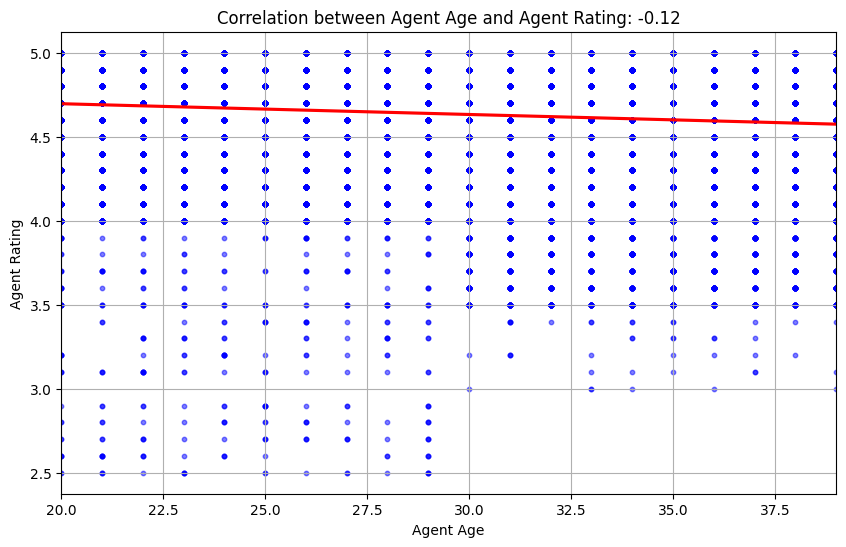

In [30]:
# Calculate the correlation coefficient between Agent Age and Agent Rating
correlation_age_rating = df_cleaned['Agent_Age'].corr(df_cleaned['Agent_Rating'])
# Set the figure size
plt.figure(figsize=(10, 6))
# Scatter plot with regression line
sns.regplot(x='Agent_Age', y='Agent_Rating', data=df_cleaned, scatter_kws={'alpha':0.5, 'color':'blue', 's':10}, line_kws={'color':'red'})
# Set title and labels
plt.title(f'Correlation between Agent Age and Agent Rating: {correlation_age_rating:.2f}')
plt.xlabel('Agent Age')
plt.ylabel('Agent Rating')
# Set x-axis limits (if needed)
plt.xlim(df_cleaned['Agent_Age'].min(), df_cleaned['Agent_Age'].max())
# Add grid
plt.grid(True)
# Show plot
plt.show()



 # GENERAL ANALYSIS

1. Order and Pickup Efficiency

    Median Pickup Time: 10 minutes
    Insight: Pickup happens efficiently, typically within 10 minutes of placing an order.
    
    Average Time Between Order and Pickup: 9.99 minutes
    
    Insight: Consistency in order handling with efficient pickups.

2. Delivery Time Performance

    Median Delivery Time: 125 minutes
    Insight: Significant time gap (over 2 hours) between pickup and delivery, suggesting potential operational delays.
    
    Average Delivery Time: 124.91 minutes
    Insight: Consistent with the median, confirming sustained inefficiencies or bottlenecks in delivery operations.

3. Impact of Morning Traffic
    Traffic Delays Hypothesis:
    
    Possibility of Morning Traffic: Delays might be due to morning traffic congestion, especially if deliveries take place           during rush hours.
    
    Delivery Window Analysis:
    Orders placed between 5 p.m. and 11 p.m. suggest that deliveries may spill into the morning, affecting performance due to       rush-hour traffic.

4. Potential Causes of Delay

    Traffic Conditions: Likely a major factor in delivery delays, especially during peak hours.
    Distance: Long delivery routes or operational inefficiencies could contribute to extended times.
    Operational Bottlenecks: Inefficiencies within the system (e.g., processing delays) could exacerbate delivery times.

5. Correlation Findings

    Agent Age vs. Delivery Time: Weak Correlation (0.26)
    Insight: Age has no significant effect on delivery performance.
    
    Agent Rating vs. Delivery Time: Negative Correlation
    Insight: Higher-rated agents are slightly faster, but the correlation is weak, indicating other factors might be influencing     delivery times.

6. Time Difference Adjustments

    Handling Midnight Transactions:
    Insight: Time differences between order and pickup are accurately calculated, including adjustments for post-midnight           transactions.

7. Limitations of the Analysis

    Missing Data for February and April:
    Insight: Gaps in the data skew the overall averages and trends, limiting the accuracy of comparisons across months.
    Impact on Trends: The absence of full data reduces reliability in monthly trend identification.

Recommendations

   - Optimize Scheduling and Routing
      Use real-time traffic data to adjust delivery schedules, especially during peak order times in the evening. Leverage route       optimization tools to reduce delivery times.

   - Diversify Transport Modes
     Introduce more weather-resistant vehicles (e.g., vans or enclosed bikes) to ensure timely deliveries in adverse weather          conditions, especially given the demand for electronics.

   -  Improve Weather Preparedness
      Equip delivery bikes and scooters with proper weather gear, ensuring operational reliability even in stormy or windy             conditions.

   -  Real-Time Tracking and Transparency
      Implement real-time order tracking with accurate estimated delivery times to enhance customer satisfaction and                   transparency.

   -  Establish Additional Delivery Hubs
        Create smaller, strategic hubs in metropolitan areas to reduce delivery distances and better manage order volumes, minimizing delays caused by long routes or high traffic.